In [1]:
import sys
import numpy as np
import pandas as pd
from scipy.stats import spearmanr
sys.path.insert(0,'..')
from cider.datastore import DataStore
from cider.fairness import Fairness

In [2]:
# Create synthetic data if it doesn't exist
from os.path import exists
datapath = '../synthetic_data/fairness.csv'
if not exists(datapath):
    np.random.seed(2)
    n_rows = 1000
    n_proxies = 5
    n_characteristics = 5
    df = pd.DataFrame()
    df['unique_id'] = range(n_rows)
    df['consumption'] = 0
    for proxy in range(n_proxies):
        df['proxy' + str(proxy)] = df['consumption'] + np.random.randint(size=n_rows, low=0, high=proxy+5)
    for characteristic in range(n_characteristics):
        n_categories = np.random.randint(low=2, high=7)
        df['characteristic' + str(characteristic)] = np.random.randint(size=n_rows, low=0, high=n_categories)
        df['characteristic' + str(characteristic)] = df['characteristic' + str(characteristic)]\
            .apply(lambda x: 'group' + str(x))
    for proxy in ['proxy0', 'proxy1']:
        df[proxy] = df[proxy] + df['characteristic1'].apply(lambda x: int(x[-1]))
    df['weight'] = np.random.randint(10, 100, size=n_rows)
#     df.to_csv(fname, index=False)

Create the Fairness module by passing in a datastore object.

In [3]:
datastore = DataStore('../configs/config_new.yml', spark=False)
fairness = Fairness(datastore)

## Rank residuals

In [4]:
fairness.rank_residuals_table('consumption', ['proxy0', 'proxy1', 'proxy3'], 'characteristic1')

,proxy0,proxy1,proxy3
characteristic1,,,
group0,-0.25 (0.33),-0.21 (0.37),-0.02 (0.39)
group1,-0.06 (0.35),-0.05 (0.35),0.00 (0.38)
group2,0.06 (0.33),0.08 (0.37),-0.01 (0.39)
group3,0.25 (0.32),0.19 (0.34),0.04 (0.39)
Anova F-Stat,98.763881,57.16576,1.130716
Anova p-value,0.0,0.0,0.33557


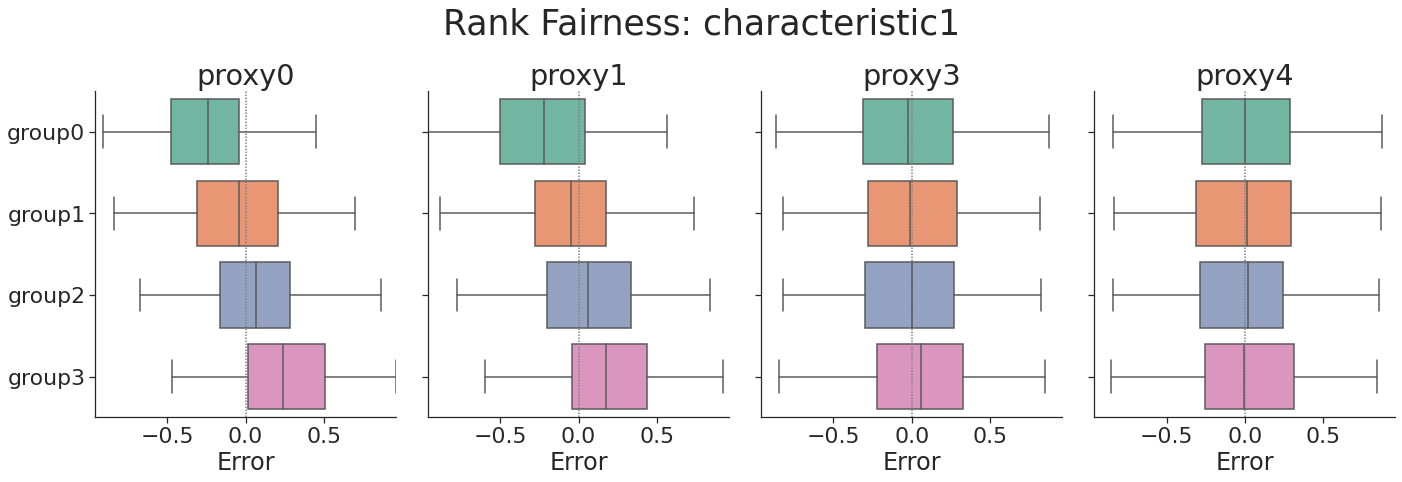

In [5]:
fairness.rank_residuals_plot('consumption', ['proxy0', 'proxy1', 'proxy3', 'proxy4'], 'characteristic1')

## Demographic Parity

In [6]:
fairness.demographic_parity_table('consumption', ['proxy0', 'proxy1', 'proxy2', 'proxy3'], 'characteristic1', 27)

,Group's share of population,Share of Group in Target Population,proxy0,proxy1,proxy2,proxy3
characteristic1,,,,,,
group0,24.90%,24.50%,32.931727,24.096386,2.409639,2.811245
group1,25.70%,29.96%,3.501946,7.392996,-7.782101,-2.334630
group2,25.90%,23.55%,-7.722008,-7.722008,6.177606,4.247104
group3,23.50%,30.21%,-30.212766,-25.106383,-0.851064,-5.106383


/mnt/d/College/f2021/URAP/cider/notebooks/../cider/fairness.py:425: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


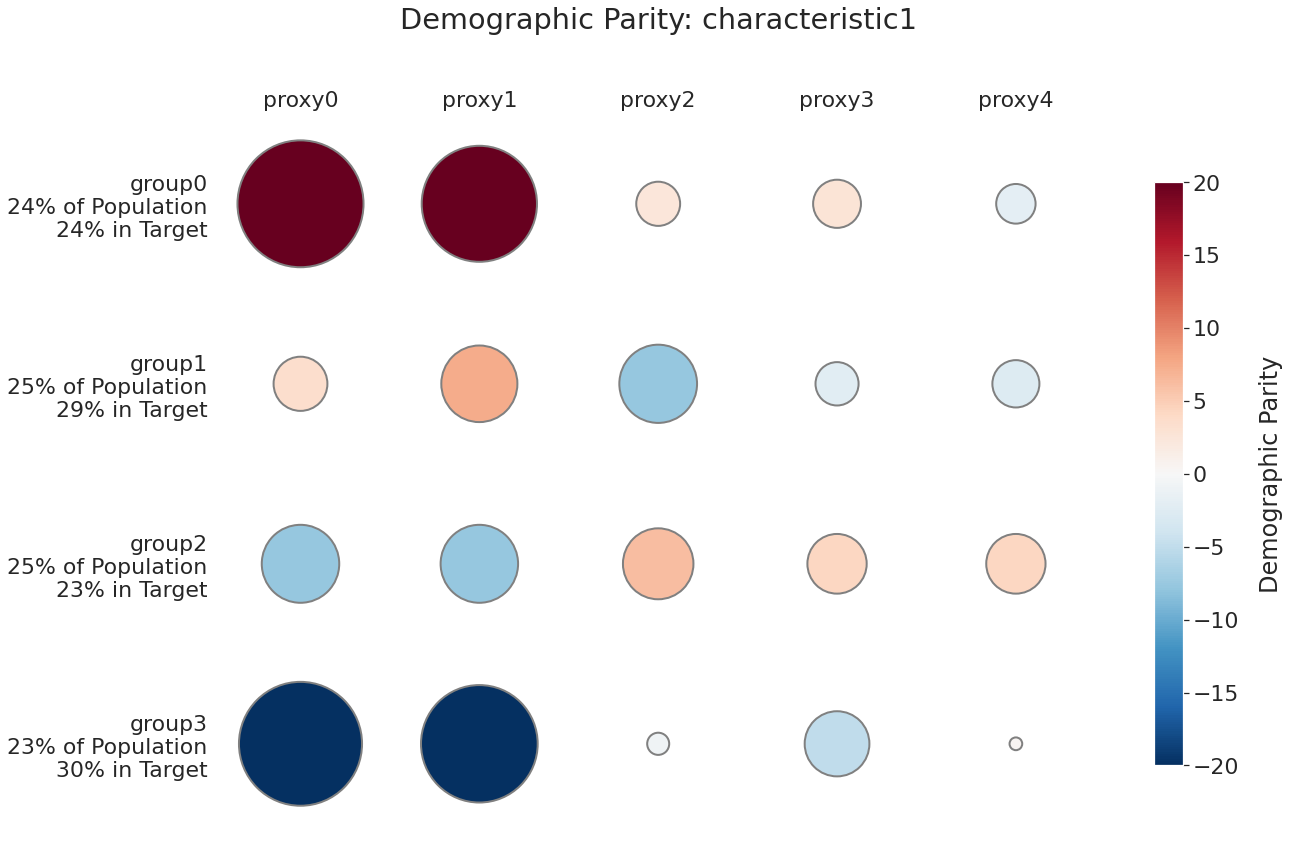

In [7]:
fairness.demographic_parity_plot('consumption', ['proxy0', 'proxy1', 'proxy2', 'proxy3', 'proxy4'], 
                                 'characteristic1', 27)

## Independence

Independence requires you to pass a p-value in which the top p% of your population will be targeted based on your proxy variables.

In [8]:
fairness.independence_table('consumption', ['proxy0', 'proxy1', 'proxy2', 'proxy3'], 'characteristic1', 27)

,Group's share of population,proxy0,proxy1,proxy2,proxy3
characteristic1,,,,,
group0,24.90%,0.5743,0.4859,0.2691,0.2731
group1,25.70%,0.3346,0.3735,0.2218,0.2763
group2,25.90%,0.1583,0.1583,0.2973,0.2780
group3,23.50%,0.0000,0.0511,0.2936,0.2511
ind_pval,,0.0000,0.0000,0.1971,0.9022


/mnt/d/College/f2021/URAP/cider/notebooks/../cider/fairness.py:425: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


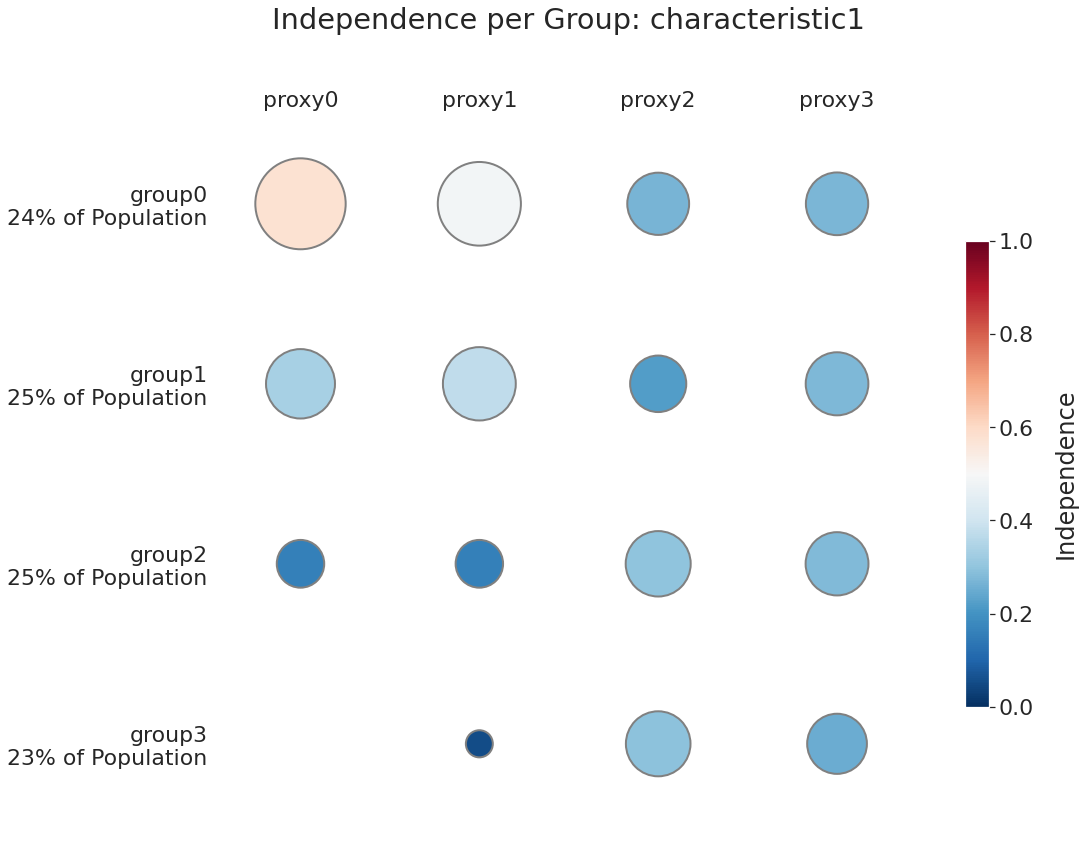

In [9]:
fairness.independence_plot('consumption', ['proxy0', 'proxy1', 'proxy2', 'proxy3'], 'characteristic1', p=27)

## Recall per group / Separation

Recall per group (analogous to separation) requires you to pass a p-value in which the top p% of your population will be targeted based on your proxy variables.

In [10]:
fairness.recall_table('consumption', ['proxy0', 'proxy1', 'proxy2', 'proxy3'], 'characteristic1', 27)

,Group's share of population,proxy0,proxy1,proxy2,proxy3
characteristic1,,,,,
group0,24.90%,0.5246,0.4754,0.2623,0.3443
group1,25.70%,0.3506,0.5325,0.2597,0.3506
group2,25.90%,0.1475,0.2787,0.3115,0.3115
group3,23.50%,0.0000,0.1690,0.3521,0.2676
ind_pval,,0.0000,0.0000,0.5807,0.7022


/mnt/d/College/f2021/URAP/cider/notebooks/../cider/fairness.py:425: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


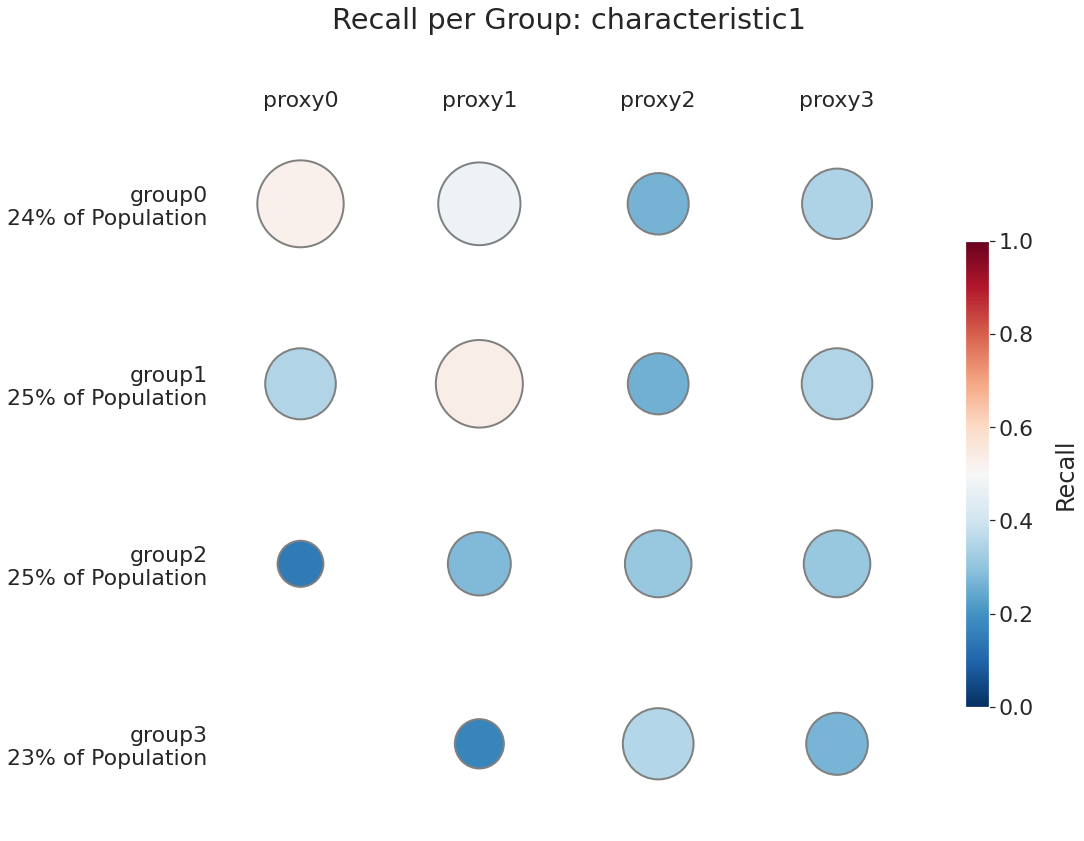

In [11]:
fairness.recall_plot('consumption', ['proxy0', 'proxy1', 'proxy2', 'proxy3'], 'characteristic1', 27)

## Precision per group / Separation

Recall per group (analogous to separation) requires you to pass a p-value in which the top p% of your population will be targeted based on your proxy variables.

In [12]:
fairness.precision_table('consumption', ['proxy0', 'proxy1', 'proxy2', 'proxy3'], 'characteristic1', 27)

,Group's share of population,proxy0,proxy1,proxy2,proxy3
characteristic1,,,,,
group0,24.90%,0.2238,0.2397,0.2388,0.3088
group1,25.70%,0.3140,0.4271,0.3509,0.3803
group2,25.90%,0.2195,0.4146,0.2468,0.2639
group3,23.50%,0.0000,1.0000,0.3623,0.3220
ind_pval,,0.2744,0.0000,0.2381,0.5182


/mnt/d/College/f2021/URAP/cider/notebooks/../cider/fairness.py:425: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


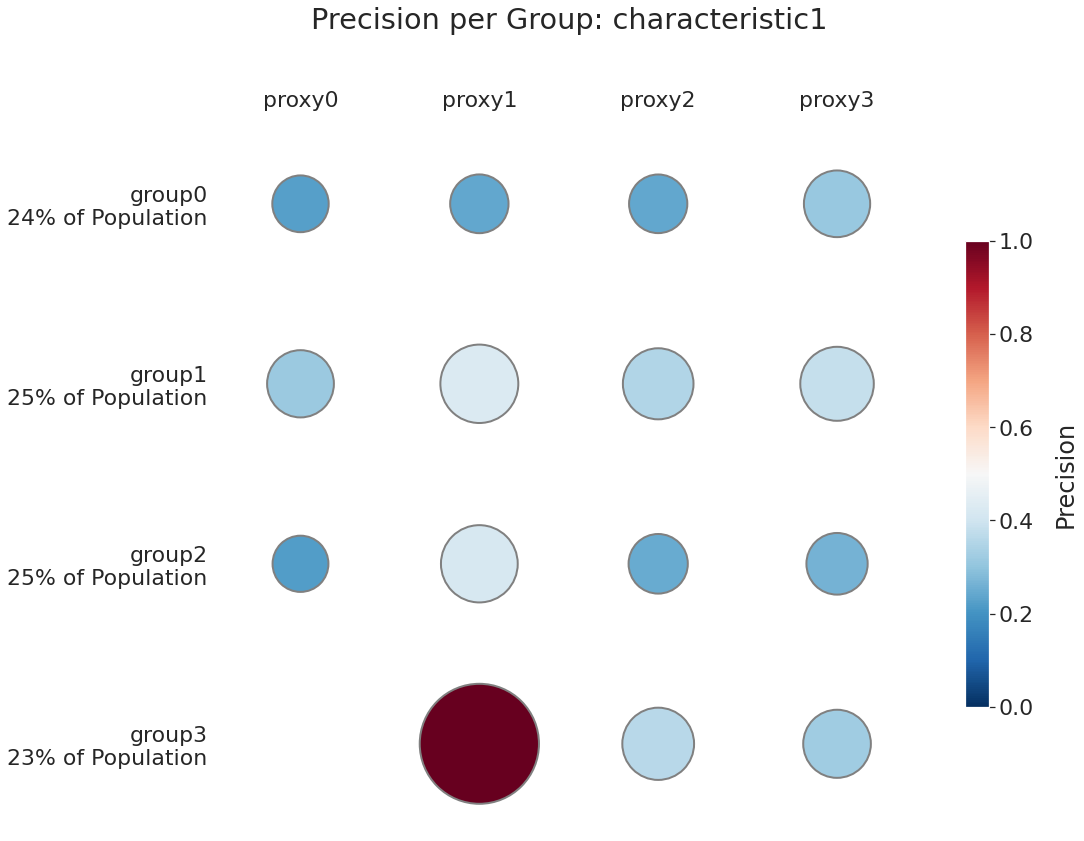

In [13]:
fairness.precision_plot('consumption', ['proxy0', 'proxy1', 'proxy2', 'proxy3'], 'characteristic1', 27)